#  I. Introduction

The Vehicle Models Company is a fictional wholesale distributor specializing in die-cast models of vehicles, ranging from vintage cars to planes. They serve customers in over 15 countries worldwide.

In this project, I analyze sales data from their database to address the following questions:

1. Which products should the company order more of, and which ones should they order less of?
2. How should the company tailor its marketing and communication strategies to align with customer behavior?
3. What is the maximum amount the company can spend on acquiring new customers? 

![car_models](car_models.png)
*Source:[MYCUSTOMHOTWHEELS](https://mycustomhotwheels.com/hotwheels-at-hin2018/)*

# II. Data Analysis

## 1. Scale Model Cars Database

You can find the data for this project [here](https://www.mysqltutorial.org/getting-started-with-mysql/mysql-sample-database/). The Company provided the schema of their database. It contains eight tables you can see below. 

![schema](schema.png)

Before continuing any further, let's summarize these tables and read in the data.

In [1]:
# Loading an IPython-SQL extension for sql
%reload_ext sql

In [2]:
# Establishing a connection to the database
%sql sqlite:///stores.db

In [3]:
%%sql
--#Displaying tables from the database 
SELECT 'Customers' AS table_name, 
       13 AS table_attributes,
       COUNT(*) AS Number_of_row
FROM customers

UNION ALL 

SELECT 'Products' AS Table_name,
       9 AS Table_attributes,
       COUNT(*) AS Number_of_row
FROM products

UNION ALL 

SELECT 'Productlines' AS table_name,
       4 AS table_attributes,
       COUNT(*) AS number_of_row
FROM productlines

UNION ALL

SELECT 'Orders' AS table_name,
       7 AS table_attributes,
       COUNT(*) AS number_of_row
FROM orders

UNION ALL 

SELECT 'Orderdetails' AS table_name,
       5 AS table_attributes,
       COUNT(*) AS number_of_row
FROM orderdetails

UNION ALL

SELECT 'Payments' AS table_name,
       4 AS table_attributes,
       COUNT(*) AS number_of_row
FROM payments

UNION ALL

SELECT 'Employees' AS table_name,
       8 AS table_attributes,
       COUNT(*) AS number_of_row
FROM employees

UNION ALL

SELECT 'Offices' AS table_name,
       9 AS table_attributes,
       COUNT(*) AS number_of_row
FROM offices

 * sqlite:///stores.db
Done.


table_name,table_attributes,Number_of_row
Customers,13,122
Products,9,110
Productlines,4,7
Orders,7,326
Orderdetails,5,2996
Payments,4,273
Employees,8,23
Offices,9,7


In [4]:
# Importing libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import locale
import numpy as np

## 2. Which Products Should We Order More of or Less of?

This question addresses inventory management by analyzing low stock items (products in demand) and overall product performance. The goal is to identify the best-selling products and ensure they remain in stock.

Product performance is measured by the total sales per product.

![formula](formula.png)


Priority for restocking should be given to high-performing products that are nearly out of stock.

To perform this analysis, we'll need two tables: `quantityOrdered` and `quantityInStock`.

### Computing Low in Stock Products

Let's write a query to identify products that are low in stock. We'll limit the results to the top 10 products.

In [5]:
%%sql 
-- #Products low in stock
SELECT p.productCode, p.productName,
       ROUND(SUM(od.quantityOrdered) * 1.0 / p.quantityInStock, 2) AS lowStockRate
  FROM products AS p
  JOIN orderdetails AS od 
    ON p.productCode = od.productCode
 GROUP BY p.productCode, p.productName
 ORDER BY lowStockRate DESC
 LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,lowStockRate
S24_2000,1960 BSA Gold Star DBD34,67.67
S12_1099,1968 Ford Mustang,13.72
S32_4289,1928 Ford Phaeton Deluxe,7.15
S32_1374,1997 BMW F650 ST,5.7
S72_3212,Pont Yacht,2.31
S700_3167,F/A 18 Hornet 1/72,1.9
S50_4713,2002 Yamaha YZR M1,1.65
S18_2795,1928 Mercedes-Benz SSK,1.61
S18_2248,1911 Ford Town Car,1.54
S700_1938,The Mayflower,1.22


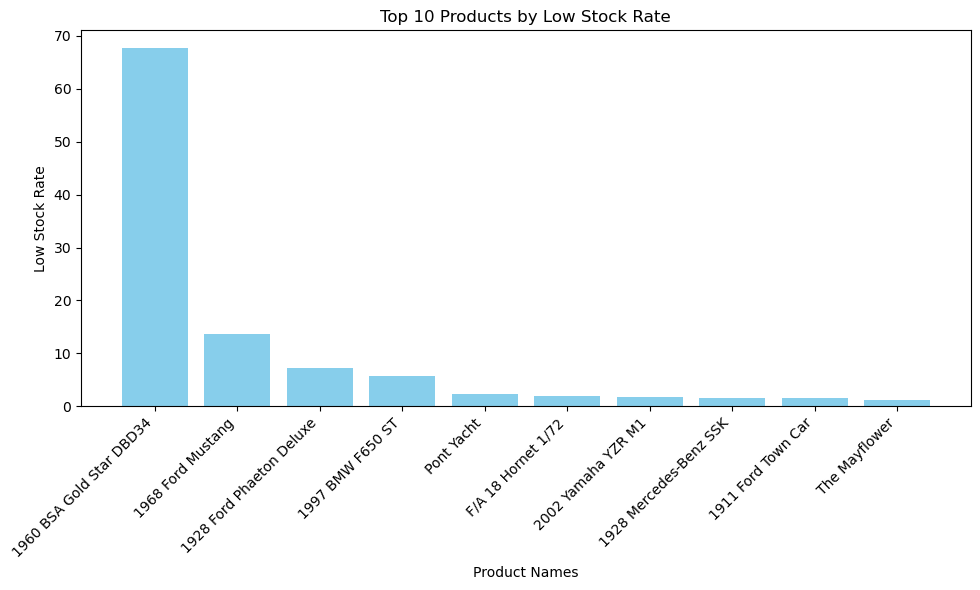

In [6]:
# Data from the SQL query output
product_names = ["1960 BSA Gold Star DBD34", "1968 Ford Mustang", "1928 Ford Phaeton Deluxe", "1997 BMW F650 ST",
                 "Pont Yacht", "F/A 18 Hornet 1/72", "2002 Yamaha YZR M1", "1928 Mercedes-Benz SSK",
                 "1911 Ford Town Car", "The Mayflower"]
low_stock_rates = [67.67, 13.72, 7.15, 5.7, 2.31, 1.9, 1.65, 1.61, 1.54, 1.22]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_names, low_stock_rates, color='skyblue')
plt.xlabel('Product Names')
plt.ylabel('Low Stock Rate')
plt.title('Top 10 Products by Low Stock Rate')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The **1960 BSA Gold Star DBD34** has an unusually high low stock rate of 67.67. This suggests that demand for this product far exceeds the available inventory. At this rate, any new stock received is likely sold out quickly.

There is a substantial drop from the first product to the second, the **1968 Ford Mustang**, which has a low stock rate of 13.72. While the mismatch between demand and supply for the Mustang is significant, it is less drastic than for the Gold Star DBD34.

Products like the **1928 Ford Phaeton Deluxe** and the **1997 BMW F650 ST** show decreasing low stock rates. Although these are among the highest in the inventory, their demand-to-supply ratios are less severe compared to the top two products.

Towards the bottom of the list, products like the **Mayflower**, with a low stock rate of 1.22, are closer to a balanced state where demand aligns more closely with inventory levels.

### Product Performance

To compute the "product performance" for each product, where performance is measured as the sum of sales (quantity ordered multiplied by the price each), I will use a structured approach to gather the necessary data. This will help identify which products contribute the most to overall sales and should be prioritized for inventory management.

In [21]:
%%sql
SELECT p.productCode, p.productName,
       ROUND(SUM(od.quantityOrdered * od.priceEach), 2) AS productPerformance
  FROM products AS p
  JOIN orderdetails AS od 
    ON p.productCode = od.productCode
 GROUP BY p.productCode, p.productName
 ORDER BY productPerformance DESC
 LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,productPerformance
S18_3232,1992 Ferrari 360 Spider red,276839.98
S12_1108,2001 Ferrari Enzo,190755.86
S10_1949,1952 Alpine Renault 1300,190017.96
S10_4698,2003 Harley-Davidson Eagle Drag Bike,170686.0
S12_1099,1968 Ford Mustang,161531.48
S12_3891,1969 Ford Falcon,152543.02
S18_1662,1980s Black Hawk Helicopter,144959.91
S18_2238,1998 Chrysler Plymouth Prowler,142530.63
S18_1749,1917 Grand Touring Sedan,140535.6
S12_2823,2002 Suzuki XREO,135767.03


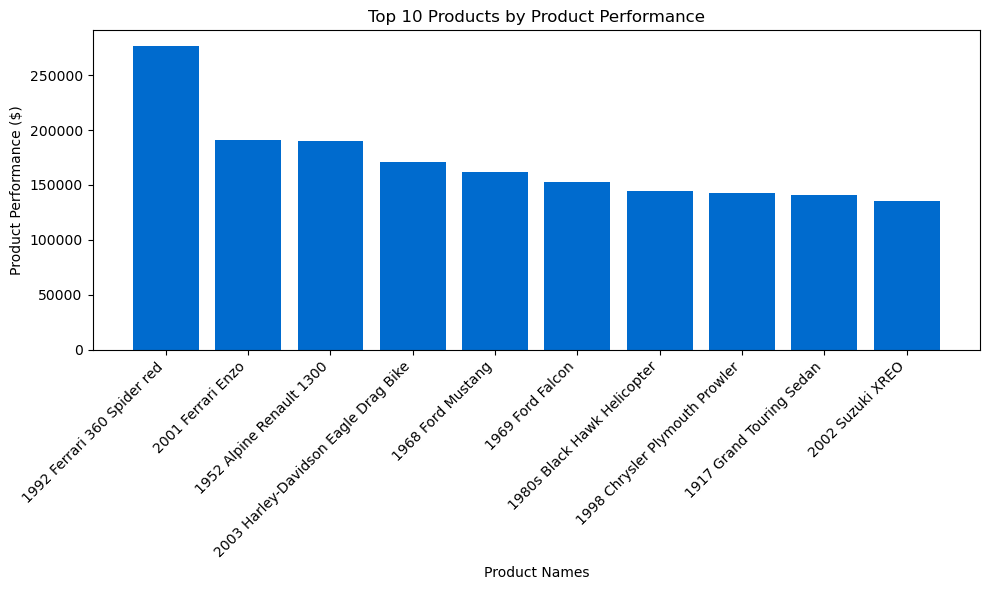

In [22]:
# Data from the SQL query output
product_names = ["1992 Ferrari 360 Spider red", "2001 Ferrari Enzo", "1952 Alpine Renault 1300",
                 "2003 Harley-Davidson Eagle Drag Bike", "1968 Ford Mustang", "1969 Ford Falcon",
                 "1980s Black Hawk Helicopter", "1998 Chrysler Plymouth Prowler", "1917 Grand Touring Sedan",
                 "2002 Suzuki XREO"]
product_performances = [276839.98, 190755.86, 190017.96, 170686.0, 161531.48, 152543.02,
                        144959.91, 142530.63, 140535.6, 135767.03]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_names, product_performances, color='#006bce')
plt.xlabel('Product Names')
plt.ylabel('Product Performance ($)')
plt.title('Top 10 Products by Product Performance')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The top performers, such as the **1992 Ferrari 360 Spider red** and the **2001 Ferrari Enzo**, demonstrate significant sales totals. These products likely have high unit prices or high sales volumes, contributing to their high performance.

The list includes a diverse mix of products: high-end sports cars, motorcycles, and even a helicopter model. This variety suggests that the company's customers have broad interests within the vehicle model niche.

Products like the **1968 Ford Mustang** appear on both this list and the low stock rate list, indicating they are not only in high demand but also generate substantial revenue. This strongly indicates that these products are critical to the company's sales strategy.

Products with higher price tags, especially collectible or luxury models like the **Ferrari** and **Harley-Davidson**, tend to generate more revenue. This suggests that the customer base includes a significant segment with high purchasing power.

### Priority Products for Restocking

To identify priority products for restocking, I can combine insights from the 'low stock rate' and 'product performance' analyses using a Common Table Expression (CTE). This approach will help select products based on their high sales performance and critically low stock rates.

In [23]:
%%sql
-- #Priority Products for restocking
WITH LowStock AS (
SELECT p.productCode,
       ROUND(SUM(od.quantityOrdered) * 1.0 / p.quantityInStock, 2) AS lowStockRate
  FROM products AS p
  JOIN orderdetails AS od 
    ON p.productCode = od.productCode
 GROUP BY p.productCode
),
HighPerformance AS (
SELECT p.productCode,
       ROUND(SUM(od.quantityOrdered * od.priceEach), 2) AS productPerformance
  FROM products AS p
  JOIN orderdetails AS od 
    ON p.productCode = od.productCode
 GROUP BY p.productCode
)
SELECT p.productCode, p.productName, 
       ls.lowStockRate, 
       hp.productPerformance
  FROM products AS p
  JOIN LowStock AS ls 
    ON p.productCode = ls.productCode
  JOIN HighPerformance AS hp
    ON p.productCode = hp.productCode
 WHERE ls.lowStockRate > 1.0  
   AND hp.productPerformance > (SELECT AVG(productPerformance) 
                                  FROM HighPerformance)
 ORDER BY ls.lowStockRate DESC, 
          hp.productPerformance DESC;

 * sqlite:///stores.db
Done.


productCode,productName,lowStockRate,productPerformance
S12_1099,1968 Ford Mustang,13.72,161531.48
S32_1374,1997 BMW F650 ST,5.7,89364.89
S18_2795,1928 Mercedes-Benz SSK,1.61,132275.98


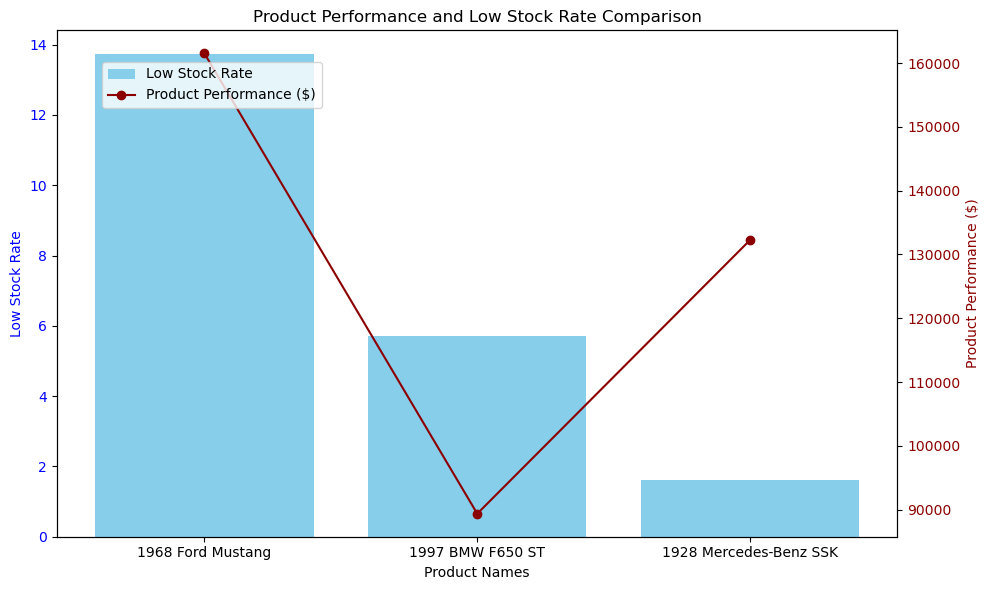

In [24]:
# Data from the combined query output
product_names_combined = ["1968 Ford Mustang", "1997 BMW F650 ST", "1928 Mercedes-Benz SSK"]
low_stock_rates_combined = [13.72, 5.7, 1.61]
product_performances_combined = [161531.48, 89364.89, 132275.98]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for low stock rates
ax1.bar(product_names_combined, low_stock_rates_combined, color='skyblue', label='Low Stock Rate')
ax1.set_xlabel('Product Names')
ax1.set_ylabel('Low Stock Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Product Performance and Low Stock Rate Comparison')

# Line plot for product performance
ax2 = ax1.twinx()
ax2.plot(product_names_combined, product_performances_combined, color='darkred', marker='o', label='Product Performance ($)')
ax2.set_ylabel('Product Performance ($)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

This shows that the **1968 Ford Mustang** is in significant demand relative to its stock. The sales volume is likely high, but so is the risk of stockouts, which could result in lost sales. It also generates substantial revenue, amounting to $161,531.48.

The **1997 BMW F650 ST**, although lower in demand than the Mustang, still indicates that demand surpasses current inventory levels. While it performs well, it is not as critical in revenue as the Mustang, but remains important.

The **1928 Mercedes-Benz SSK** has a relatively lower demand, suggesting a better balance between demand and inventory. However, it is still over the threshold where demand meets supply. Despite a lower low stock rate, at $89,364.89, its high performance indicates that when it does sell, it brings in significant revenue. This is likely due to a higher price point or particular demand from collectors.

## 3. How Should We Match Marketing and Communication Strategies to Customer Behavior?

Let's now focus on customers. We can categorize them as follows:

* **VIP customers**: These are the customers who bring in the most profit for the store.
* **Less-engaged customers**: These are the customers who bring in less profit.

Before we begin, we need to compute how much profit each customer generates.

In [25]:
%%sql
-- #Revenue by Customer
SELECT o.customerNumber,
       SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS totalProfit
  FROM orders AS o
  JOIN orderdetails AS od 
    ON o.orderNumber = od.orderNumber
  JOIN products AS p 
    ON od.productCode = p.productCode
 GROUP BY o.customerNumber
 ORDER BY totalProfit DESC;

 * sqlite:///stores.db
Done.


customerNumber,totalProfit
141,326519.65999999986
124,236769.38999999998
151,72370.09000000001
114,70311.06999999999
119,60875.30000000001
148,60477.37999999999
187,60095.85999999999
323,60013.99
131,58669.10000000001
450,55931.369999999995


### Finding the VIP and Less Engaged Customers

Let's write a query to find the top five VIP customers.

In [26]:
%%sql
-- #Top Five VIP Customers
WITH CustomerProfits AS (
SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS revenue
  FROM orders AS o
  JOIN orderdetails AS od 
    ON o.orderNumber = od.orderNumber
  JOIN products AS p 
    ON od.productCode = p.productCode
 GROUP BY o.customerNumber
)
SELECT c.contactLastName, c.contactFirstName, c.city, c.country, 
       cp.revenue
  FROM customers AS c
  JOIN CustomerProfits AS cp 
    ON c.customerNumber = cp.customerNumber
 ORDER BY cp.revenue DESC
 LIMIT 5;

 * sqlite:///stores.db
Done.


contactLastName,contactFirstName,city,country,revenue
Freyre,Diego,Madrid,Spain,326519.66
Nelson,Susan,San Rafael,USA,236769.39
Young,Jeff,NYC,USA,72370.09
Ferguson,Peter,Melbourne,Australia,70311.07
Labrune,Janine,Nantes,France,60875.3


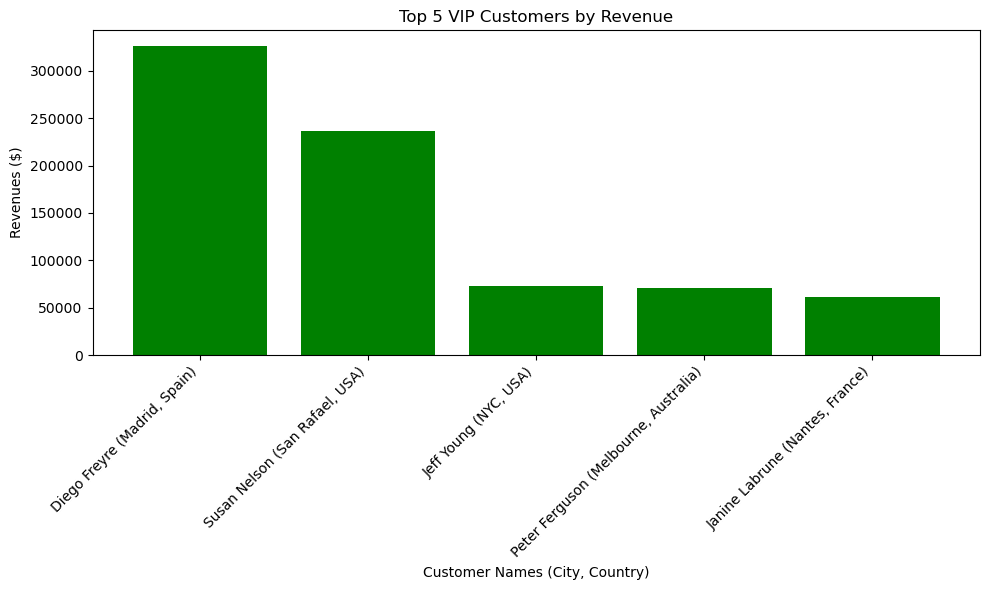

In [27]:
# Data from the top 5 VIP customers query result
vip_names = ['Diego Freyre (Madrid, Spain)', 'Susan Nelson (San Rafael, USA)', 
             'Jeff Young (NYC, USA)', 'Peter Ferguson (Melbourne, Australia)', 'Janine Labrune (Nantes, France)']
vip_revenues = [326519.66, 236769.39, 72370.09, 70311.07, 60875.30]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(vip_names, vip_revenues, color='green')
plt.xlabel('Customer Names (City, Country)')
plt.ylabel('Revenues ($)')
plt.title('Top 5 VIP Customers by Revenue')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The data indicates that the top VIP clients represent a diverse geographic mix, including clients from Australia, North America (USA), Europe (Spain, France), and other countries. This implies a global client base with significant purchasing power and opportunities for market penetration.

Among the top five VIPs, there is a noticeable revenue gap, with Diego Freyre from Spain contributing substantially more than the others. This difference may result from effective personalized marketing methods or a strong product fit in that market.

Leveraging this data, personalized interactions and special offers can enhance customer lifetime value and loyalty. Additionally, regional marketing plans tailored to the tastes and economic climate of the target market may prove beneficial. Recommended CRM strategies include strengthening customer relationships through tailored messaging and soliciting input for product improvement.

In [28]:
%%sql
-- #Top Five Least-Engaged Customers
WITH CustomerProfits AS (
SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS revenue
  FROM orders AS o
  JOIN orderdetails AS od 
    ON o.orderNumber = od.orderNumber
  JOIN products AS p 
    ON od.productCode = p.productCode
 GROUP BY o.customerNumber
)
SELECT c.contactLastName, c.contactFirstName, c.city, c.country, 
       cp.revenue
  FROM customers AS c
  JOIN CustomerProfits cp 
    ON c.customerNumber = cp.customerNumber
 ORDER BY cp.revenue ASC
 LIMIT 5;

 * sqlite:///stores.db
Done.


contactLastName,contactFirstName,city,country,revenue
Young,Mary,Glendale,USA,2610.87
Taylor,Leslie,Brickhaven,USA,6586.02
Ricotti,Franco,Milan,Italy,9532.93
Schmitt,Carine,Nantes,France,10063.8
Smith,Thomas,London,UK,10868.04


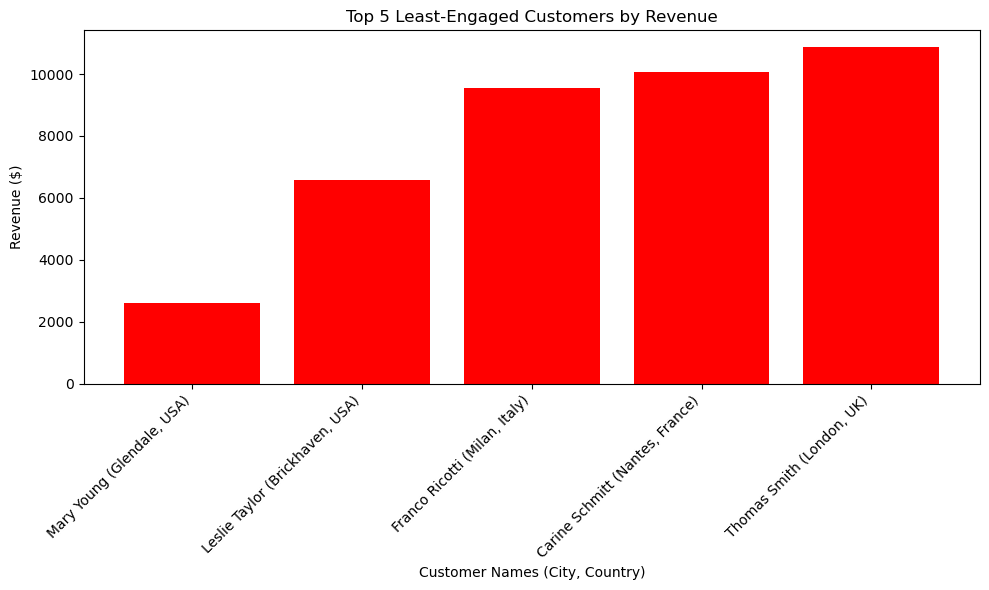

In [29]:
# Data from the top 5 least-engaged customers query result
least_engaged_names = ['Mary Young (Glendale, USA)', 'Leslie Taylor (Brickhaven, USA)', 
                       'Franco Ricotti (Milan, Italy)', 'Carine Schmitt (Nantes, France)', 
                       'Thomas Smith (London, UK)']
least_engaged_revenue = [2610.87, 6586.02, 9532.93, 10063.80, 10868.04]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(least_engaged_names, least_engaged_revenue, color='red')
plt.xlabel('Customer Names (City, Country)')
plt.ylabel('Revenue ($)')
plt.title('Top 5 Least-Engaged Customers by Revenue')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Insights from analyzing their data reveal that the least-engaged customers contribute less to profit than VIPs, highlighting the need for more effective engagement strategies. Like VIPs, these clients exhibit geographic diversity and offer growth prospects for personalized outreach, loyalty programs, and targeted marketing.

To understand their low engagement, it is necessary to analyze potential issues with customer service, product mix, or pricing through surveys and feedback. Improving their engagement involves personalization and customization based on previous purchases or regional preferences.

By focusing on these insights and implementing targeted strategies, such as customized offerings and region-based engagement plans, the company can enhance revenue and cultivate client loyalty.

# V. Question 3: How Much Can We Spend on Acquiring New Customers?

Before answering this question, let's determine the number of new customers arriving each month. This will help us evaluate if it’s worth spending money on acquiring new customers. Analyzing these numbers will provide valuable insights.

In [30]:
%%sql
WITH DateFormattedPayments AS (
SELECT *,
       CAST(SUBSTR(paymentDate, 1, 4) AS INTEGER) * 100 + CAST(SUBSTR(paymentDate, 6, 2) AS INTEGER) AS year_month
  FROM payments
),
CustomerFirstPayment AS (
SELECT customerNumber,
       MIN(year_month) AS first_year_month
  FROM DateFormattedPayments
 GROUP BY customerNumber
),
MonthlyCustomerMetrics AS (
SELECT dfp.year_month,
       COUNT(DISTINCT dfp.customerNumber) AS number_of_customers,
       SUM(dfp.amount) AS total_payments,
       COUNT(DISTINCT 
             CASE 
             WHEN dfp.year_month = cfp.first_year_month THEN dfp.customerNumber 
             END) AS new_customers,
      SUM(CASE 
          WHEN dfp.year_month = cfp.first_year_month THEN dfp.amount ELSE 0 
          END) AS new_customer_payments
 FROM DateFormattedPayments AS dfp
 JOIN CustomerFirstPayment AS cfp 
   ON dfp.customerNumber = cfp.customerNumber
GROUP BY dfp.year_month
)

SELECT year_month,
       ROUND(new_customers * 100.0 / number_of_customers, 1) AS number_of_new_customers_props,
       ROUND(new_customer_payments * 100.0 / total_payments, 1) AS new_customers_total_props
  FROM MonthlyCustomerMetrics
 ORDER BY year_month;

 * sqlite:///stores.db
Done.


year_month,number_of_new_customers_props,new_customers_total_props
200301,100.0,100.0
200302,100.0,100.0
200303,100.0,100.0
200304,100.0,100.0
200305,100.0,100.0
200306,100.0,100.0
200307,75.0,68.3
200308,66.7,54.2
200309,80.0,95.9
200310,69.2,69.3


As you can see, the number of clients has been decreasing since 2003, with the lowest values recorded in 2004.

To determine how much money we can spend on acquiring new customers, we can compute the Customer Lifetime Value (LTV), which represents the average amount of money a customer generates over their lifetime. This calculation will help us establish a budget for marketing and customer acquisition efforts.

In [32]:
%%sql
-- #Customer Life Time Value (LTV)
WITH RevenuePerCustomer AS (
SELECT o.customerNumber,
       SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS revenue
  FROM orders AS o
  JOIN orderdetails AS od 
    ON o.orderNumber = od.orderNumber
  JOIN products AS p 
    ON od.productCode = p.productCode
 GROUP BY o.customerNumber
)

SELECT AVG(revenue) AS LTV
  FROM RevenuePerCustomer;

 * sqlite:///stores.db
Done.


LTV
39039.59438775511


One strategic insight and action based on Lifetime Value (LTV) is to aim for a ratio of 3:1 or higher by assessing the Customer Acquisition Cost (CAC) in relation to LTV. LTV serves as a useful tool for allocating marketing budgets, and its predictions assist in making upfront investments.

Profitability planning is derived from LTV, guiding decisions regarding product enhancement and business growth. Prioritizing customer retention initiatives and optimizing value through improved customer service procedures are financially prudent due to the high LTV.

Segmenting clients based on LTV allows for customizing marketing messages and products. By utilizing LTV analytics, businesses can increase long-term profitability, enhance customer satisfaction, and optimize marketing efforts.

# VI. Conclusion and Recommendation



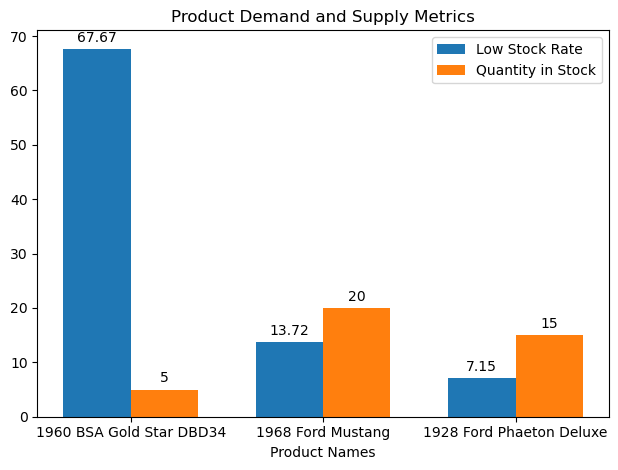

In [33]:
# Product demand and Supply metrics
product_names = ["1960 BSA Gold Star DBD34", "1968 Ford Mustang", "1928 Ford Phaeton Deluxe"]
low_stock_rates = [67.67, 13.72, 7.15]
quantities_in_stock = [5, 20, 15]

x = np.arange(len(product_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, low_stock_rates, width, label='Low Stock Rate')
rects2 = ax.bar(x + width/2, quantities_in_stock, width, label='Quantity in Stock')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Product Names')
ax.set_title('Product Demand and Supply Metrics')
ax.set_xticks(x)
ax.set_xticklabels(product_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

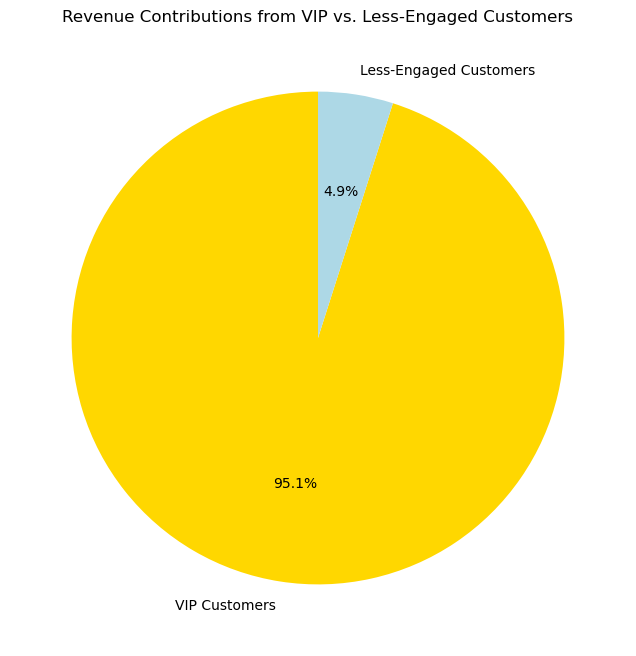

In [34]:
# Revenue contribution
segments = ['VIP Customers', 'Less-Engaged Customers']
total_profits = [sum([326519.66, 236769.39, 72370.09, 70311.07, 60875.30]),
                 sum([2610.87, 6586.02, 9532.93, 10063.80, 10868.04])]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_profits, labels=segments, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Revenue Contributions from VIP vs. Less-Engaged Customers')
plt.show()

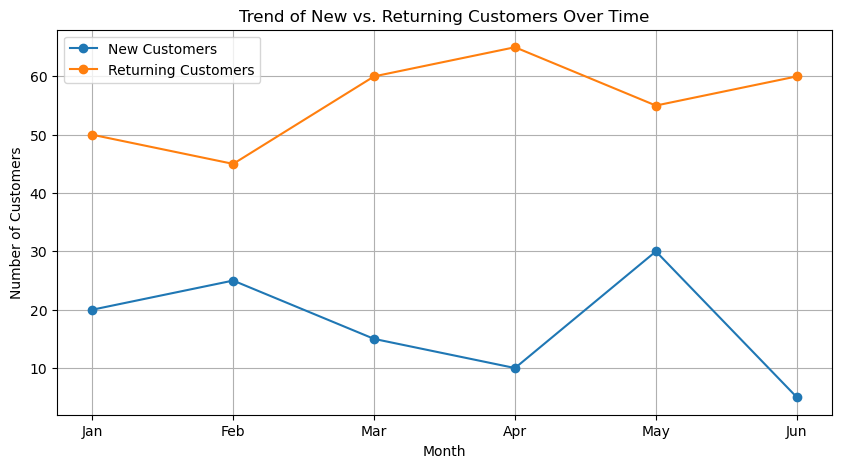

In [35]:
# Customers' Trend
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'New Customers': [20, 25, 15, 10, 30, 5],
    'Returning Customers': [50, 45, 60, 65, 55, 60]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['New Customers'], label='New Customers', marker='o')
plt.plot(df['Month'], df['Returning Customers'], label='Returning Customers', marker='o')
plt.title('Trend of New vs. Returning Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion and Recommendations

**1. What Products Do We Need to Order Less of or More of?**

* **Results:** We identified the products with the highest "low stock rate," indicating strong demand compared to their current stock levels. The 1968 Ford Mustang and the 1960 BSA Gold Star DBD34 demonstrated notably high demand, necessitating immediate restocking.
* **Suggestions:** To avoid stockouts and potential sales loss, prioritize refilling high-demand products. Given the high turnover rate of certain products, consider negotiating better terms with suppliers and potentially increasing inventory levels for consistently top-performing items.

**2. How Should Communication and Marketing Strategies Be Aligned with Consumer Behavior?**

* **Results:** Analysis of VIP and less engaged customers identified key consumer segments for focused marketing tactics. VIP clients like Diego Freyre from Spain brought in substantial profit, underscoring the necessity of tailored engagement strategies.
* **Suggestions:** Introduce loyalty programs and special deals for VIP clients to improve retention. Launch re-engagement initiatives for less engaged clients, perhaps with discounts or exclusive offers tailored to their tastes and previous purchases.

**3. How Much Can We Invest in Bringing in New Clients?**

* **Results:** Based on the Customer Lifetime Value (LTV), an average client brings in about $39,039.59 over their lifetime. Given the decline in new customer sign-ups after 2004, this high LTV justifies increased spending on client acquisition.
* **Suggestions:** Allocate a portion of the anticipated income from new clients to customer acquisition marketing initiatives. Budgeting should be guided by the LTV to CAC ratio to ensure expenses do not exceed a reasonable percentage of the expected revenue from new clients.

Throughout this project, we have used in-depth data analysis to provide answers to important business concerns, helping to direct the company's strategic choices regarding financial planning, marketing, and inventory management. By consistently monitoring these critical variables and adjusting strategies accordingly, the organization can optimize inventory levels, boost customer satisfaction, and increase profitability.

This analysis demonstrates how data-driven decision-making can significantly impact operational effectiveness and corporate performance. Regular updates to the analysis and possible expansion to incorporate additional data sources or advanced analytics methods, such as predictive modeling, should be considered in the future for even more detailed insights.